In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\iamaf\Downloads\train.csv")
data.head(3)

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16 00:00:00.000000000,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16 00:00:00.000000000,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16 00:00:00.000000000,1.645427,5.456560,1.0,7.389056,2.890372,1


In [3]:
data.shape

(1639424, 7)

## Data Cleaning

In [4]:
print(data.duplicated().sum())

57315


In [5]:
print((data.duplicated().sum() / len(data)) * 100)

3.4960449523735164


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().sum()

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1582109 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Date    1582109 non-null  object 
 1   X1      1582109 non-null  float64
 2   X2      1582109 non-null  float64
 3   X3      1582109 non-null  float64
 4   X4      1582109 non-null  float64
 5   X5      1582109 non-null  float64
 6   target  1582109 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.6+ MB


In [9]:
data.describe()

,X1,X2,X3,X4,X5,target
count,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06
mean,1.142747e+00,5.488090e+00,4.259295e+32,2.803710e+29,1.210019e+00,8.869806e-03
std,1.397365e-01,1.345799e-02,2.388275e+35,5.917340e+31,1.310279e+00,9.376107e-02
min,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.053376e+00,5.480472e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.107383e+00,5.488855e+00,1.000000e+00,1.000000e+00,6.931472e-01,0.000000e+00
75%,1.218962e+00,5.496635e+00,1.000000e+00,2.718282e+00,2.890372e+00,0.000000e+00
max,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00,1.000000e+00


# Exploratory Data Analysis

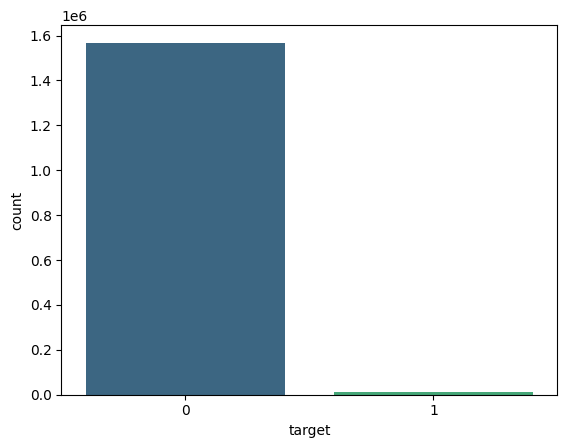

In [10]:
sns.countplot(data=data, x='target', palette='viridis')
plt.show()

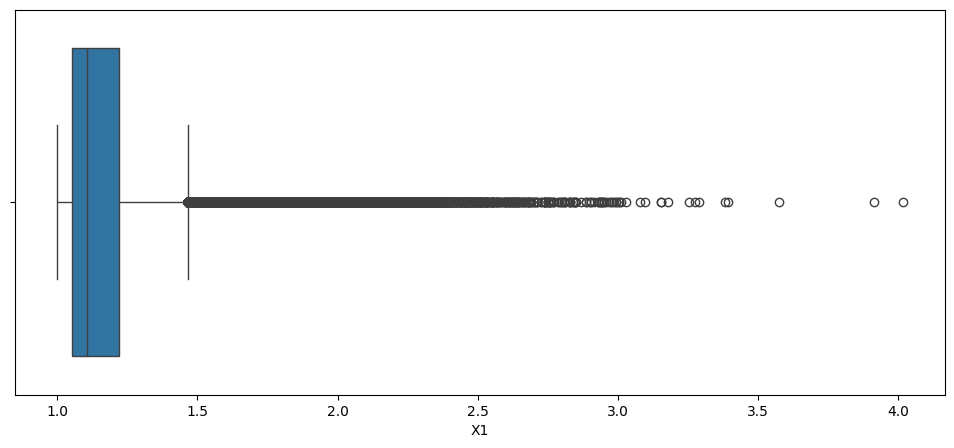

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X1')
plt.show()

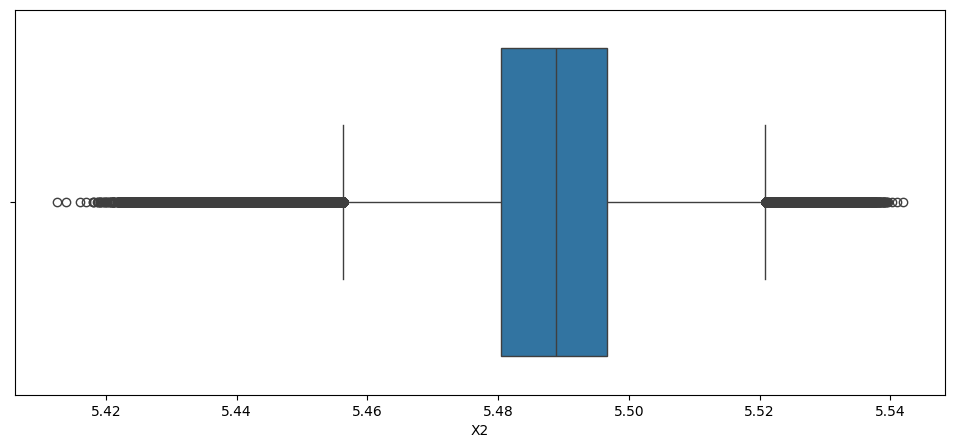

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X2')
plt.show()

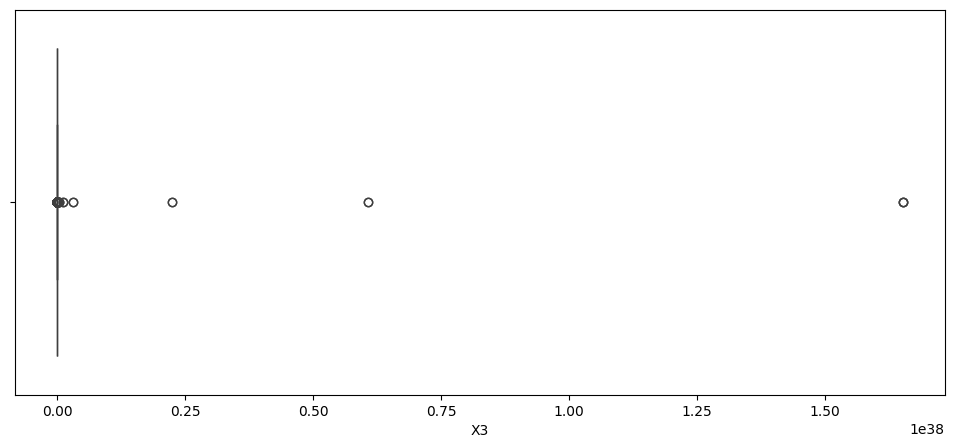

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X3')
plt.show()

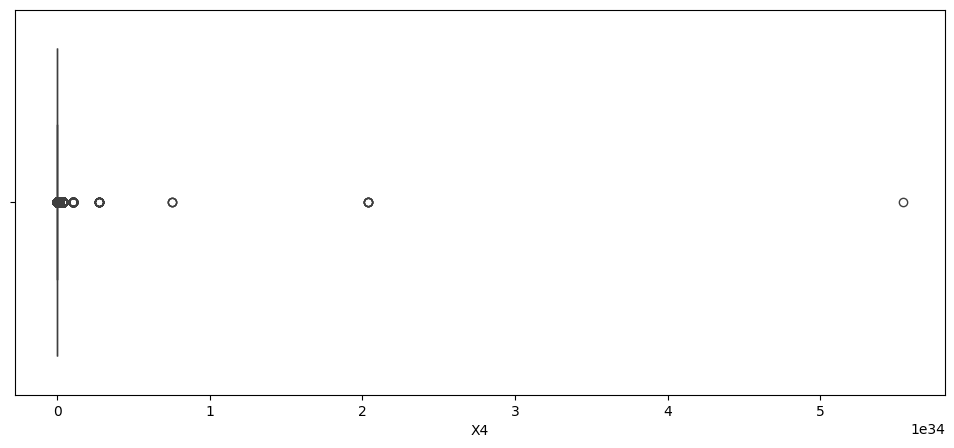

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X4')
plt.show()

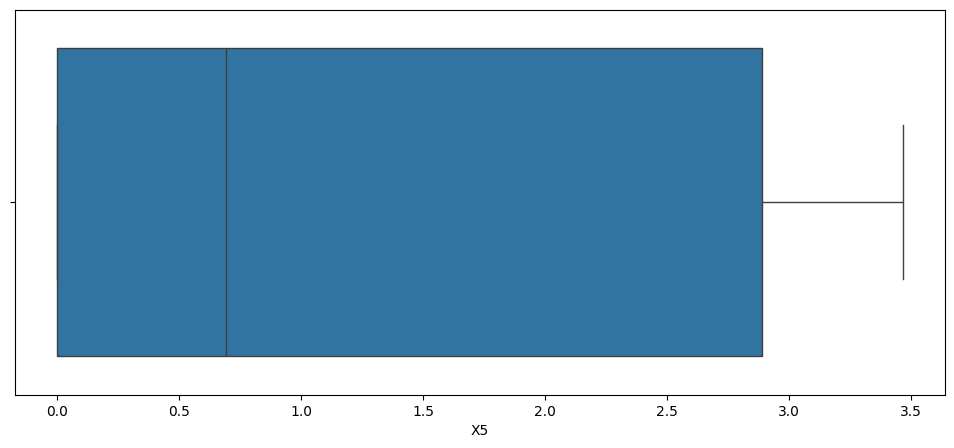

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X5')
plt.show()

In [16]:
data.shape

(1582109, 7)

In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
def remove_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return data[(data[col] >= lower) & (data[col] <= upper)]


In [19]:
for col in ['X1', 'X2', 'X3', 'X4', 'X5']:
    data = remove_outliers(data, col)

In [20]:
data.describe()

,X1,X2,X3,X4,X5,target
count,1.235546e+06,1.235546e+06,1235546.0,1.235546e+06,1.235546e+06,1.235546e+06
mean,1.116822e+00,5.489659e+00,1.0,1.357398e+00,1.103096e+00,7.518943e-04
std,1.051375e-01,1.185359e-02,0.0,6.974075e-01,1.277874e+00,2.741039e-02
min,1.000000e+00,5.456602e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.482346e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.096365e+00,5.490012e+00,1.0,1.000000e+00,6.931472e-01,0.000000e+00
75%,1.178214e+00,5.497455e+00,1.0,1.000000e+00,2.890372e+00,0.000000e+00
max,1.465212e+00,5.520861e+00,1.0,2.718282e+00,3.465736e+00,1.000000e+00


In [ ]:
column = ['X1', 'X2', 'X3', 'X4', 'X5']
for i, col in enumerate(column, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
sns.boxplot(data=data, x='target', y='X1')
plt.show()

In [ ]:
data2 = data.drop('Date', axis=1)

plt.figure(figsize=(12,6))
sns.heatmap(data=data2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Correlation Analysis Insights
- The dataset shows low multicollinearity among features.
- X1 and X4 have a moderate positive correlation (~0.41).
- All features show very weak linear correlation with the target variable.
- This indicates that non-linear models may be more suitable than linear models.


## Feature Engineering Techniques

In [ ]:
x = data.drop('Target', 'Date', ax)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler